In [83]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [84]:
import numpy as np
import pandas as pd

In [85]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [86]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [87]:
# Create the connection engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [88]:
# list tables using read_sql via engine.connection
conn = engine.connect()
data = pd.read_sql("SELECT name FROM sqlite_master ", conn)
data.head()

,name
0,measurement
1,station


In [89]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [90]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [91]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [92]:
# list all records from 'station' table
data = engine.execute("SELECT * FROM station")
for record in data:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [93]:
# Use `engine.execute` to list the first 10 rows from the measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [94]:
# reflect an existing database into a new model
#Base.metadata.create_all(engine)
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [95]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [96]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [97]:
# Create our session (link) from Python to the DB
session = Session(engine)
# get the first record from 'measurement' class collection
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xa1609c8>,
 'id': 1,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'tobs': 65.0,
 'prcp': 0.08}

In [98]:
# get the first record from 'station' class collection
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xa14de48>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

In [99]:
# print the first 4 station names
for row in session.query(station.name, station.station).limit(4).all():
    print(row)

('WAIKIKI 717.2, HI US', 'USC00519397')
('KANEOHE 838.1, HI US', 'USC00513117')
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830')
('PEARL CITY, HI US', 'USC00517948')


# Exploratory Climate Analysis

In [100]:
session.query(func.count(measurement.date)).all()

[(19550)]

In [101]:
# first date
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [102]:
# last date
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [103]:
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Start Date: ", start_date)

Start Date:  2016-08-23


In [104]:
end_date = dt.date(2017, 8, 23) - dt.timedelta(days=0)
print("End Date: ", end_date)

End Date:  2017-08-23


In [105]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [106]:
 #filter(measurement.date.between(start_date,end_date)).all()
measurement_li = session.query(measurement.date, measurement.prcp).\
    order_by(measurement.date).\
    filter(measurement.date >= start_date).all() 

# show first 10 elements
measurement_li[:10]

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28)]

In [107]:
measurement_df = pd.DataFrame(measurement_li, columns=['date', 'prcp'])
measurement_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [108]:
#measurement_df.groupby('date').prcp.agg('sum')
measurement_df.set_index('date', inplace=True)

In [109]:
measurement_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


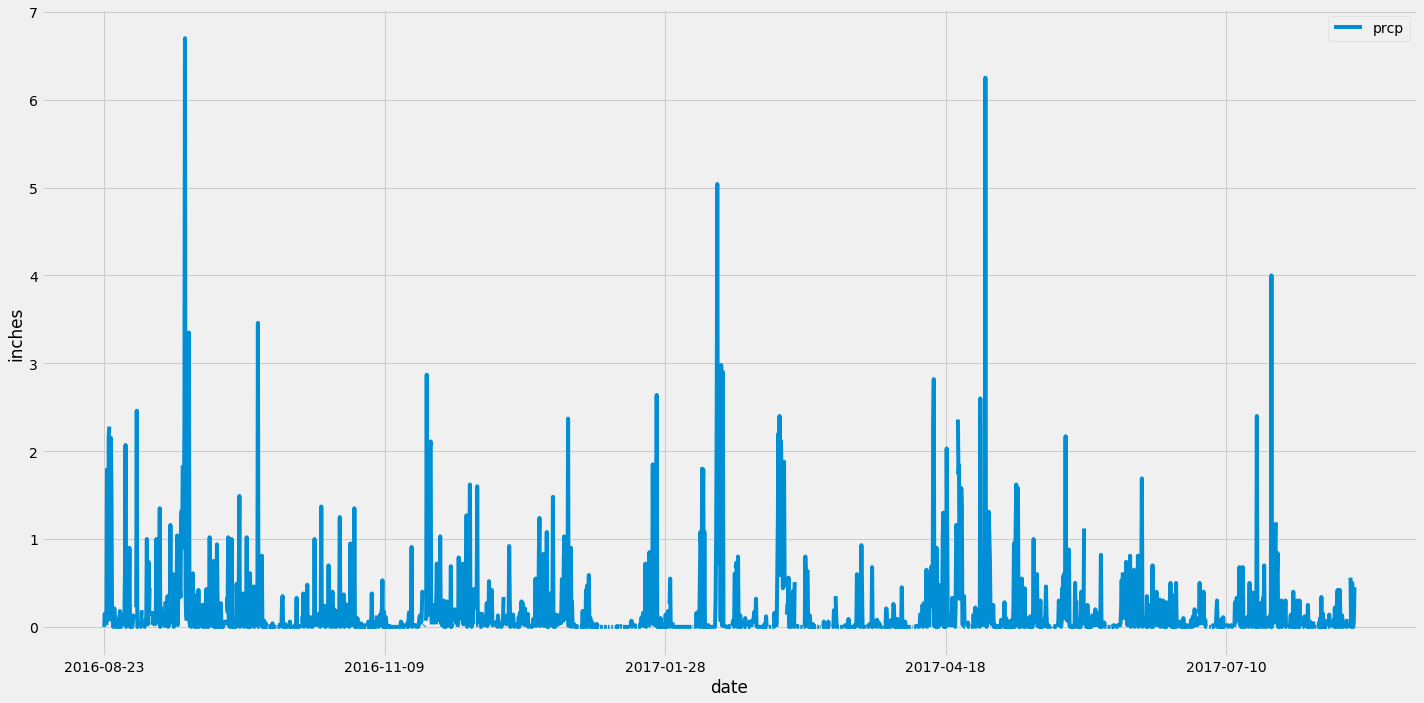

In [110]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.plot(figsize=(20,10))
plt.xlabel('date')
plt.ylabel('inches')
plt.tight_layout()
plt.show()

In [111]:
measurement_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [112]:
# Design a query to show how many stations are available in this dataset?
session.query(measurement).group_by(measurement.station).count()

9

In [113]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.prcp)).group_by(measurement.station).order_by(measurement.station.desc()).all()

[('USC00519523', 2572),
 ('USC00519397', 2685),
 ('USC00519281', 2772),
 ('USC00518838', 342),
 ('USC00517948', 683),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00513117', 2696),
 ('USC00511918', 1932)]

In [114]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
min = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
max = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
avg = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print("min. temp: ", min)
print("max. temp: ", max)
print("avg. temp: ", avg)

min. temp:  [(54.0,)]
max. temp:  [(85.0,)]
avg. temp:  [(71.66378066378067,)]


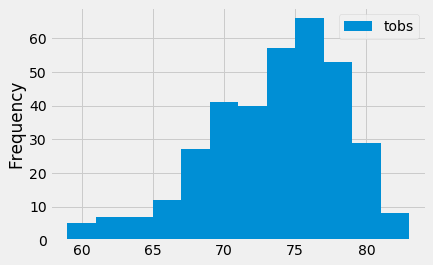

In [115]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result_li = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= start_date).all()

result_df = pd.DataFrame(result_li, columns=['tobs'])

result_df.plot.hist(bins=12)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
